![img](https://mediapipe.dev/images/mobile/pose_tracking_full_body_landmarks.png)

In [2]:
import cv2
import mediapipe as mp
import time
import matplotlib.pyplot as plt

In [2]:
def get_landmarks(right_arm , left_arm):
    pass

In [3]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

# For webcam input:
get_left_point = [11,13,15]
get_right_point = [12,14,16]

start_time = int(time.time())

cap = cv2.VideoCapture(0)  #웹캠 키기.
with mp_pose.Pose(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as pose:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image)
    
    left_arm = list()
    right_arm = list()
    # print(results.pose_world_landmarks.landmark[:20])
    
    x , y = image.shape[1] , image.shape[0]

    for i in get_left_point:
      left_arm.append(results.pose_landmarks.landmark[i])

    for i in get_right_point:
      right_arm.append(results.pose_landmarks.landmark[i])
    left_arm_point = (int(left_arm[-1].x * x) , int(left_arm[-1].y * y))
    right_arm_point =  (int(right_arm[-1].x * x) , int(right_arm[-1].y * y))
    
    try:
      cv2.line(image ,left_arm_point , right_arm_point , (0,255,0) )
    except Exception as e:
      print(e)
    
    
    

    # Draw the pose annotation on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,  #점 나오게 함.
        mp_pose.POSE_CONNECTIONS,  #점들을 연결.
        # landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style() #다양한 point color 로 그림.
        )

    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Pose', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      cv2.waitKey(0)
      cv2.destroyAllWindows()
      break
    
    #10초 지나면 꺼짐.
    # elif int(time.time()) - start_time == 10:
      # print(image.shape) 
      # cv2.destroyAllWindows()
      # break


cv2.destroyAllWindows()    
cap.release()

In [31]:
int(time.time())

1667959534

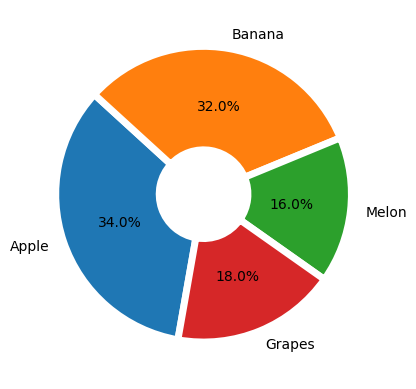

In [134]:
ratio = [34, 32, 16, 18]
labels = ['Apple', 'Banana', 'Melon', 'Grapes']
explode = [0.05, 0.05, 0.05, 0.05]  ##중심에서 벗어나는 정도.
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}  ##부채꼴 모양 설정.
                                                                # wedgeprops는 부채꼴 영역의 스타일을 설정합니다.
                                                                # wedgeprops 딕셔너리의 ‘width’, ‘edgecolor’, ‘linewidth’ 키를 이용해서 각각 부채꼴 영역의 너비 (반지름에 대한 비율),
                                                                # 테두리의 색상, 테두리 선의 너비를 설정했습니다.
colors = ['silver', 'gold', 'whitesmoke', 'lightgray']  #이거 아래에 바로 집어 넣으면 됨.

# plt.pie(ratio, labels=labels, autopct='%.1f%%')
# plt.show()


plt.pie(x =  ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False  , wedgeprops=wedgeprops)
plt.show()

# startangle는 부채꼴이 그려지는 시작 각도를 설정합니다.
# counterclock=False로 설정하면 시계 방향 순서로 부채꼴 영역이 표시됩니다.
# shadow를 True로 설정하면, 파이 차트에 그림자가 표시됩니다.

plt.pie(x = ratio, labels=labels, autopct="%.1f%%", startangle=260, counterclock=False , wedgeprops = wedgeprops)


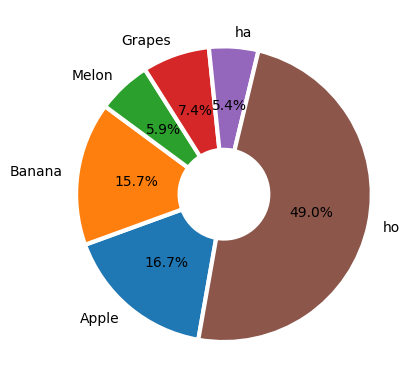

In [15]:
def make_plt_pie(make_plt):
    base_code = 'plt.pie(x = ratio, labels=labels, autopct="%.1f%%", startangle=260, counterclock=False '
    
    for i in make_plt:
        if make_plt[i] == False:
            continue
        else:
            jj = ', '+i + ' = ' + i
            base_code += jj
    base_code += ')'
    print(base_code)
    return base_code

def one_graph(ratio , labels , colors = None , explode = None , wedgeprops = None):

    if len(ratio) != len(labels):
        return 'ratio , labels The number must be the same'

    
    make_plt = dict()
    for i in ['colors' , 'explode' , 'wedgeprops' ]: #, 'wedgeprops'
        if eval(i) == None:
            make_plt[i] = False
        else:
            make_plt[i] = True
    
    # wedgeprops = {'width': 0.7}  #가운데 비어두기. linewidth 는 5만큼 떨어짐. 'edgecolor': 'w'  edgcolor 은 사이드 컬러가 w임.
    
    explodes = list()
    if explode != None:
        if len(explode) == 2:
            if explode[1] == 'defult':
                for i in range(len(ratio)):
                    explodes.append(explode[0])
            elif explode[1] == 'big':          ##큰거 튀어나오게.
                for i in range(len(ratio)):
                    if max(ratio) == ratio[i]:
                        explodes.append(explode[0] + 0.2)
                    else:
                        explodes.append(explode[0])

            elif explode[1] == 'small':  ##작은거 튀어나오게.
                for i in range(len(ratio)):
                    if min(ratio) == ratio[i]:
                        explodes.append(explode[0] + 0.2)
                    else:
                        explodes.append(explode[0])
            else:
                return 'pop_out , Please choose None or big or small'
        else:
            for i in range(len(ratio)):
                explodes.append(explode[0])
    explode = explodes
    plt_result = make_plt_pie(make_plt)
    eval(plt_result)
    plt.show()


ratio = [34, 32, 12, 15 , 11  , 100]
labels = ['Apple', 'Banana', 'Melon', 'Grapes' , 'ha' , 'ho']
colors = ['silver', 'gold', 'whitesmoke', 'lightgray']
linewidth = 3
edgecolor = 'w'
width = 0.7


one_graph(ratio = ratio ,labels =  labels  , wedgeprops= {'width': width , 'edgecolor' : edgecolor , 'linewidth': linewidth}) #, wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
    

In [65]:
jj = 10
eval('jj')

10

In [1]:
import one_graph as on


# on.one_graph(ratio = ratio ,labels =  labels  ,explode=[0.00 , 'small'], wedgeprops= {'width': width , 'edgecolor' : edgecolor , 'linewidth': linewidth})


In [2]:
on.manual()

This is one_graph.py manual
The function one_graph parameter type is ratio , labels , explode , wedgeprops
ratio 는 그래프의 값을 의미 합니다. list 형식으로 넣습니다. 예 [30, 40 , 13 , 10]
label 은 각 값의 이름을 의미합니다. list 형식으로 넣습니다. 예 ["사과" , "배" , "수박" , "두리안"]
ratio 와 label 은 개수가 같아야 합니다.
colors 를 추가 하고 싶다면 컬러를 list 형식으로 ratio 개수와 같게 넣어야 합니다. 예 ["silver", "gold", "whitesmoke", "lightgray"]
wedgeprops 는 dict 형태로 넣습니다. 예 wedgeprops= {"width": 0.7, "edgecolor" : "w" , "linewidth": 2}
wedgeprops 의 width 는 가운데가 뚫린 원 형태의 그래프를 출력합니다. 값이 클수록 가운데 원이 작아집니다.
wedgeprops 의 edgecolor 은 그래프 가장자리 색깔을 의미 합니다. 
wedgeprops 의 linewidth 는 가장자리 색깔의 두깨를 의미합니다.
